<a href="https://colab.research.google.com/github/JayeonKangNature/2022_Summer_Internship/blob/main/Task/RC4_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Download and Mounting

In [ ]:
# Mounting
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14519, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14519 (delta 0), reused 1 (delta 0), pack-reused 14515
Receiving objects: 100% (14519/14519), 5.94 MiB | 2.11 MiB/s, done.
Resolving deltas: 100% (10506/10506), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 151 kB 60.4 MB/s 
     |████████████████████████████████| 1.4 MB 59.1 MB/s 
     |████████████████████████████████| 509 kB 69.9 MB/s 
     |████████████████████████████████| 248 kB 54.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... don

# 1. Initial Setting

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("Train", {},  "/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/train/_annotations.coco.json", "/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/train")

In [ ]:
register_coco_instances("Test", {},  "/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/test/_annotations.coco.json", "/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/test")
register_coco_instances("Valid", {},  "/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/valid/_annotations.coco.json", "/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/valid")

# 2. Train and Test

In [ ]:
parasite_metadata = MetadataCatalog.get("Train")
dataset_dicts = DatasetCatalog.get("Train")

WARNING [08/27 12:31:12 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/27 12:31:12 d2.data.datasets.coco]: Loaded 768 images in COCO format from /content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/train/_annotations.coco.json


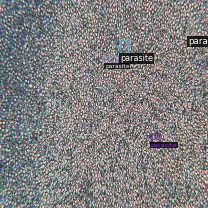

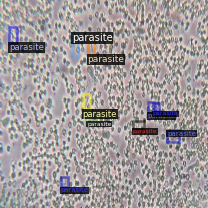

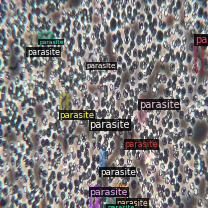

In [ ]:
import random

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=parasite_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("Train",)
cfg.DATASETS.TEST = ("Valid",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://ImageNetPretrained/MSRA/R-50.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[08/27 13:28:54 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


[08/27 13:28:55 d2.engine.train_loop]: Starting training from iteration 0
[08/27 13:29:01 d2.utils.events]:  eta: 0:01:25  iter: 19  total_loss: 1.332  loss_cls: 0.4452  loss_box_reg: 0.0089  loss_rpn_cls: 0.6622  loss_rpn_loc: 0.1095  time: 0.3063  data_time: 0.0147  lr: 0.0012854  max_mem: 5633M
[08/27 13:29:07 d2.utils.events]:  eta: 0:01:20  iter: 39  total_loss: 0.7367  loss_cls: 0.1664  loss_box_reg: 0.01355  loss_rpn_cls: 0.4076  loss_rpn_loc: 0.1349  time: 0.3142  data_time: 0.0073  lr: 0.0026174  max_mem: 5633M
[08/27 13:29:14 d2.utils.events]:  eta: 0:01:16  iter: 59  total_loss: 0.9081  loss_cls: 0.2811  loss_box_reg: 0.1822  loss_rpn_cls: 0.3248  loss_rpn_loc: 0.1032  time: 0.3213  data_time: 0.0071  lr: 0.0039494  max_mem: 5633M
[08/27 13:29:21 d2.utils.events]:  eta: 0:01:10  iter: 79  total_loss: 1.282  loss_cls: 0.3389  loss_box_reg: 0.3078  loss_rpn_cls: 0.3696  loss_rpn_loc: 0.1436  time: 0.3201  data_time: 0.0077  lr: 0.0052814  max_mem: 5633M
[08/27 13:29:27 d2.util

# 3. Visualization of Result

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("Test", )
predictor = DefaultPredictor(cfg)

[08/27 13:30:48 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

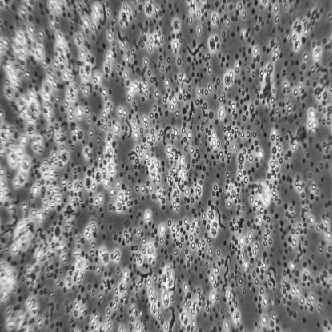

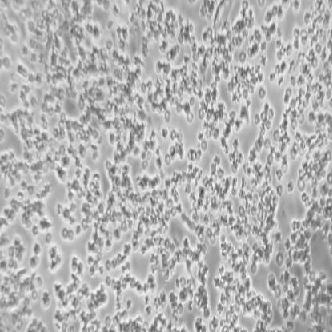

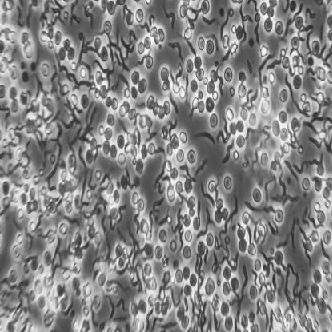

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=parasite_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
parasite_metadata

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/train', json_file='/content/drive/MyDrive/RC4_2022_summer_internship/trypanosome/train/_annotations.coco.json', name='Train', thing_classes=['parasite', 'parasite'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1})